<a href="https://colab.research.google.com/github/moiroudelliott/hough/blob/main/random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image en entrée :


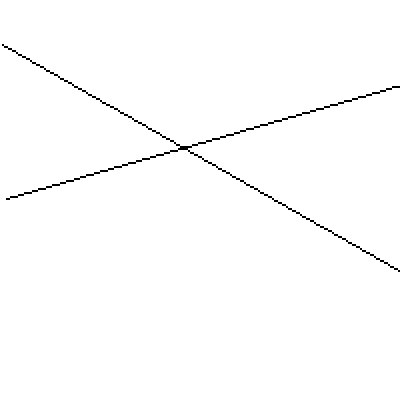

Détection de contours :


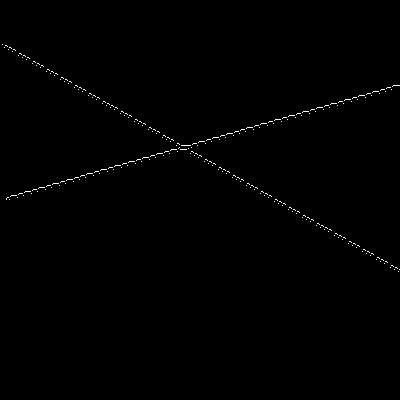

In [33]:
# Les modules :

from google.colab import drive
import sys
import math
import cv2 as cv
import numpy as np
import math as m
from google.colab.patches import cv2_imshow
import random as r

# Accès au fichiers du drives :

drive.mount('/content/drive')

# Importation de l'image :

nomFichier = 'test3.png'
path='/content/drive/My Drive/python/' + nomFichier
img = cv.imread(path)
print("Image en entrée :")

larg = len(img[0])
haut = len(img)

coeff = 400/larg

img = cv.resize(img, (400, int(haut*coeff)), interpolation = cv.INTER_AREA)

cv2_imshow(img)

# Je commence par griser l'image :
gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)


# Puis j'effectue la détection de contour canny :
cannyOr = cv.Canny(gray, 90, 250, None, 3)
print("Détection de contours :")
cv2_imshow(cannyOr)

(34, 61) (167, 137)


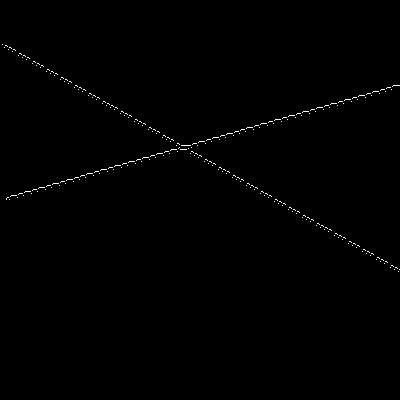

(214, 137) (69, 179)


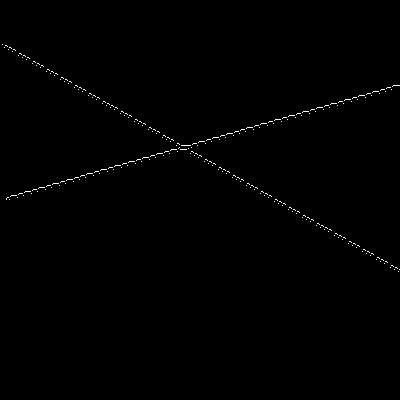

(213, 137) (175, 149)


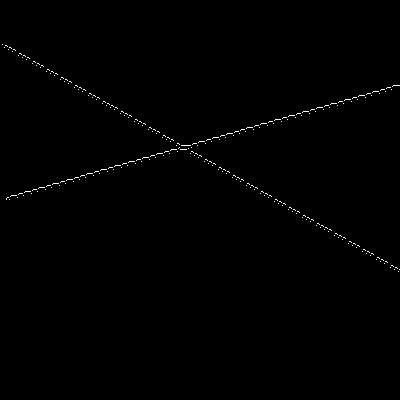

(30, 191) (308, 217)


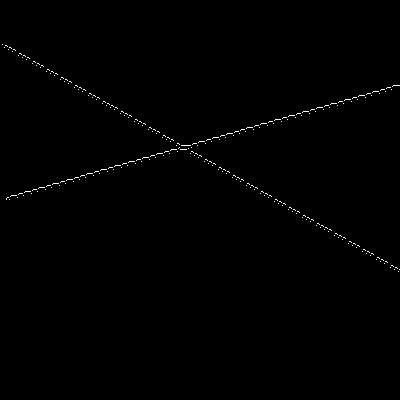

(141, 122) (173, 149)


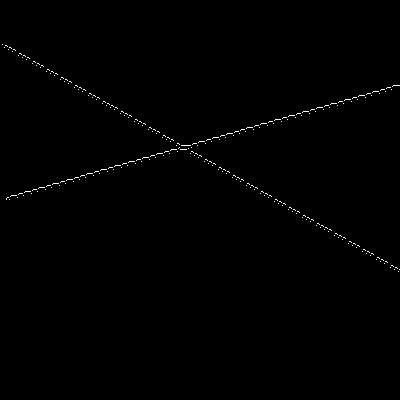

(362, 251) (120, 113)


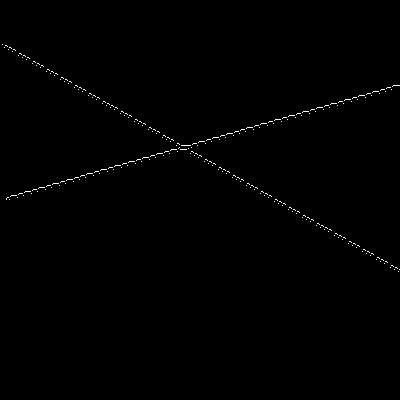

(335, 233) (200, 155)


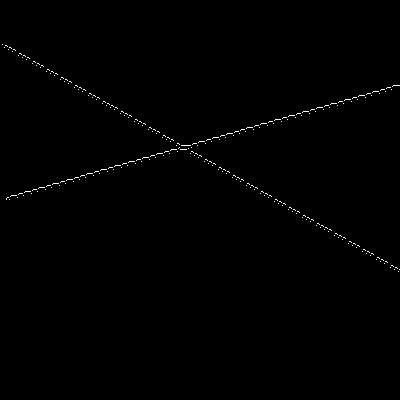

(227, 133) (258, 125)


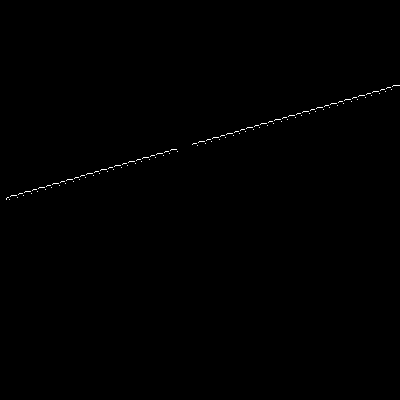

(29, 191) (221, 135)


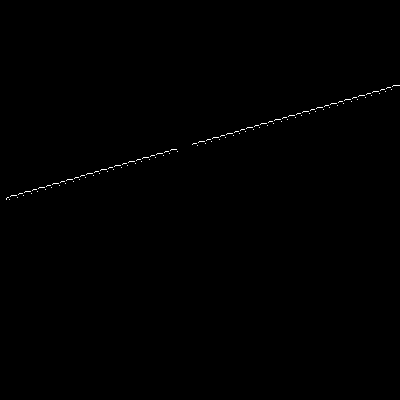

[[(0, 41), (400, 270)], [(0, 198), (400, 83)]]


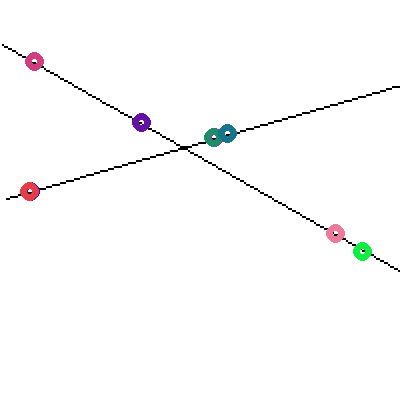

Taille de l'image : 400400


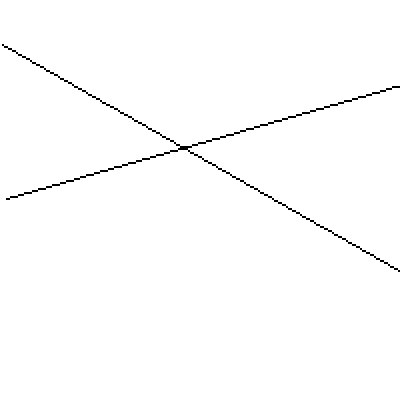

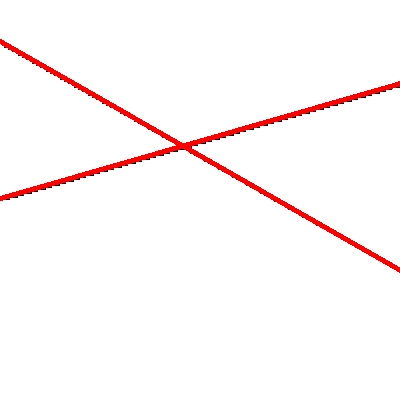

In [34]:
canny = np.copy(cannyOr)

def detection(dico:dict, seuil:int)->list:

  '''...'''

  # On crée un tableau de résultats vide pour le moment
  res = []

  # On tourne dans tout le dico
  for co in dico:
    # Si le point dépasse le seuil on l'ajoute à notre tableau de résultats
    if dico[co] >= seuil:
      res.append(co)
      dico[co] = -np.inf
  return res

def can_to_list(img:list)->list:

  '''Prend en entrée une détection de contours d'image (canny) en noir et blanc 
  et renvoie une liste de coordonnées des points qui ne sont pas noirs'''

  # Je récupère les dimentions de l'image en question
  haut = len(img)
  larg = len(img[1])


  # Je crée notre liste de coordonnées vide pour le moment
  res = []

  # Je boucle dans toute l'image avec les variables x et y
  for y in range(haut):
    for x in range(larg):

      # Je regarde si le pixel est clair
      if img[y][x] > 0:

        # S'il l'est je l'ajoute à la liste
        res.append((x, y))

  return res

def point(canny, dico, pro, img):
  haut = len(canny)
  larg = len(canny[0])

  list_can = can_to_list(canny)

  l = len(list_can)
  if l > 0:
    i1 = r.randint(0, l-1)
    i2 = r.randint(0, l-1)
    co1 = list_can[i1]
    co2 = list_can[i2]
  else : return

  print(co1, co2)
  color = (r.randint(0, 255), r.randint(0, 255), r.randint(0, 255))
  cv.circle(img, co1, 6, color, 5)
  cv.circle(img, co1, 6, color, 5)

  a = (co1[1]-co2[1]) / ((co1[0]-co2[0])+ 0.01)
  b = co1[1] - (co1[0] * a)

  if (a, b) not in dico:
    p = proche(dico, (a, b), pro)
    if not p[1]:
      dico[(a, b)] = 1
    else:
      dico[p[0]] += 1
  else:
    dico[(a, b)] += 1

def proche(l1:list, co2:tuple, seuil:int)->tuple:

  '''Prend une liste et un point pusi renvoie True et (-1, -1) si il est éloigné de tous les
   points False et les coordonnées du points en question sinon'''

  # On initialise notre rs à False
  res = False
  p = (-1, -1)
  # On passe dans toute la liste avec la variable co1
  for co1 in l1:

    # On fait la différence des x et des y
    dista = abs(co1[0]-co2[0])/10
    distb = abs(co1[1]-co2[1])

    # On vérifie si la somme des deux est inférieure à un seuil, si c'est le cas
    #On met res à True
    if dista + distb < seuil:
      res = True
      p = co1

  return (p, res)

def detection_ligne(img, canny, nb, seuil, pro):
  trouve = 0
  dico = {}
  res = []
  larg = len(canny[0])
  haut = len(canny)
  img2 = np.copy(img)
  img3 = np.copy(img)
  while trouve < nb:
    point(canny, dico, pro, img3)
    nouv = detection(dico, seuil)
    trouve += len(nouv)
    #print(dico)
    cv2_imshow(canny)
    for co in nouv:
      co1 = (0, int(co[1]))
      co2 = (larg, int(larg*co[0] + co[1]))
      res.append([co1, co2])
      cv.line(canny, co1, co2, (0, 0, 0), 10)
  print(res)
  cv2_imshow(img3)
  for co in res:
    cv.line(img2, co[0], co[1], (0, 0, 255), 4)
  return img2

img2 = detection_ligne(img, canny, 2, 3, 10)

print("Taille de l'image : " + str(len(img2)) + str(len(img[0])))
cv2_imshow(img)
cv2_imshow(img2)